# TRIP FEATURE ANALYSIS
## By Akolade Sofiyyah Iwalewa

## Investigation Overview

> The investigation emphasizes on the frequency, duration and length of trips.
> Important features are:
- Trip lenght
- Trip duration
- Dates (start and end times)
- Start and end stations
- Gender
- Age group and
- User types.

## Dataset Overview

> The ford gobike system dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains 16 columns and 183412 rows which became 25 columns and 174952 rows after cleaning and feature engineering. This projects explores the periods and how often the bike rides/trips are made in the area.

In [2]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

%matplotlib inline

# suppressing warnings from final output
import warnings
warnings.simplefilter("ignore")

# Setting plotting style

sns.set_style("darkgrid")
sns.set_context("paper")
base_colour = sns.color_palette()[-1]

In [3]:
# loading in the dataset into a pandas dataframe
df_copy = pd.read_csv('cleaned_bike_data.csv')

## Peak times of trip starts and ends over 24 hours.

> Most Users start their trips by 8AM in the morning, and end it by 5PM in the evening. This is one of the expected insight to the data because majority of the Users are most probably white or blue collar workers, or students who set out for work and close around those peak times.

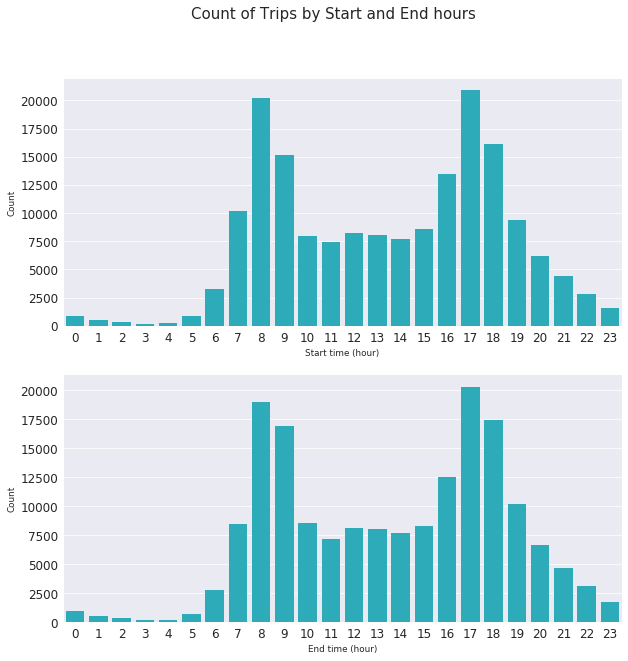

In [4]:
# Plotting bar charts to see what hour the users mostly start and end their trip
plt.figure(figsize = [10,10])
plt.suptitle('Count of Trips by Start and End hours', fontsize=15)

# For the top plot
plt.subplot(2,1,1)
sns.countplot(data = df_copy, x = 'start_time_hour', color=base_colour);
plt.xlabel('Start time (hour)');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# For the bottom plot
plt.subplot(2,1,2)
sns.countplot(data = df_copy, x = 'end_time_hour', color=base_colour);
plt.xlabel('End time (hour)');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Trend of trips across the month

> The users mostly use the bike on work days especially Monday, Tuesday, Thursday and Friday. There is a slight decrease on Wednessday compare to other week days. The use of bike is low on weekends which implies that users do no usually go out on weekends.

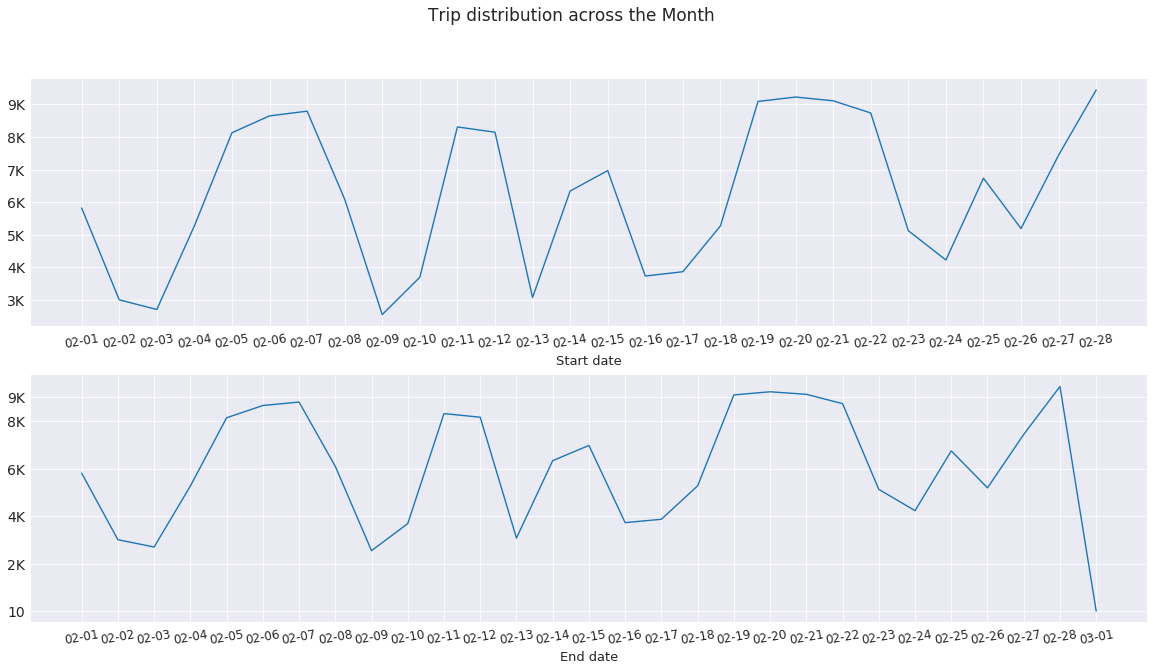

In [5]:
# Plotting a line chart to determine the month which users mostly use bike

plt.figure(figsize=[20,10])
plt.suptitle('Trip distribution across the Month', fontsize=17);

# For top plot
plt.subplot(2,1,1)
freq = df_copy.start_time_month_date.value_counts().sort_index()
plt.plot(freq.index, freq)
plt.yticks([3000,4000,5000,6000,7000,8000,9000],['3K', '4K','5K','6K','7K', '8K','9K'], fontsize=14)
plt.xticks(rotation=10, fontsize=12);
plt.xlabel('Start date', fontsize=13)

# For bottom plot
plt.subplot(2,1,2)
freq = df_copy.end_time_month_date.value_counts().sort_index()
plt.plot(freq.index, freq)
plt.yticks([10,2000,4000,6000,8000,9000],['10','2K', '4K','6K', '8K', '9K'], fontsize=14)
plt.xticks(rotation=10, fontsize=12);
plt.xlabel('End date', fontsize=13);

## How did those dates affect trips by User type?

> For both days, the relative amount of Subscribers that did not take bike trips are more than that of the Customers. This proves that Customers takes businesses seriously than Subscribers.

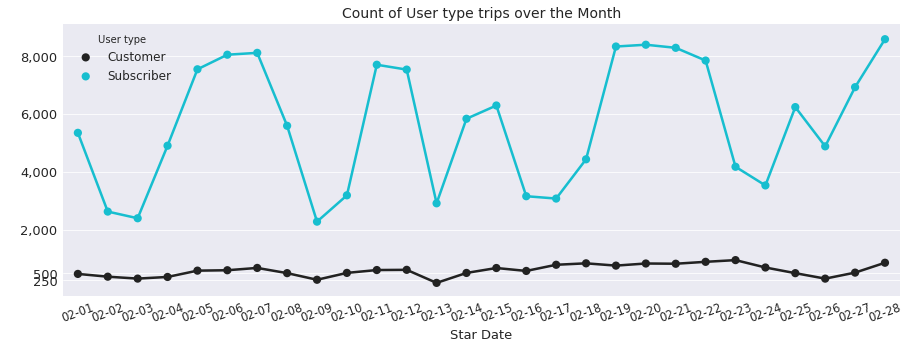

In [6]:
# Grouping the data to user type by month
user_type_by_month = df_copy.groupby(['start_time_month_date','user_type']).size().reset_index()
# Plotting a line chart to display how often do users take trips in the month
plt.figure(figsize=(15,5))
sns.pointplot(data = user_type_by_month, x='start_time_month_date', y=0, hue='user_type', color=base_colour);
plt.yticks([250, 500, 2000,4000,6000,8000],['250', '500','2,000', '4,000', '6,000', '8,000'], fontsize=13);
plt.ylabel(' ');
plt.xticks(rotation=20,fontsize=11.5);
plt.xlabel('Star Date', fontsize=13)
plt.legend(title='User type',fontsize=12, loc=2);
plt.title('Count of User type trips over the Month', fontsize=14);

## Average distance ravelled by Users by demographics
> On average, Females travel longer distances compared to males, wih age group 30-40 averaging the most distance travelled by age group. Also, Customers take longer distances compared to Subscribers who are way more than Customers. 

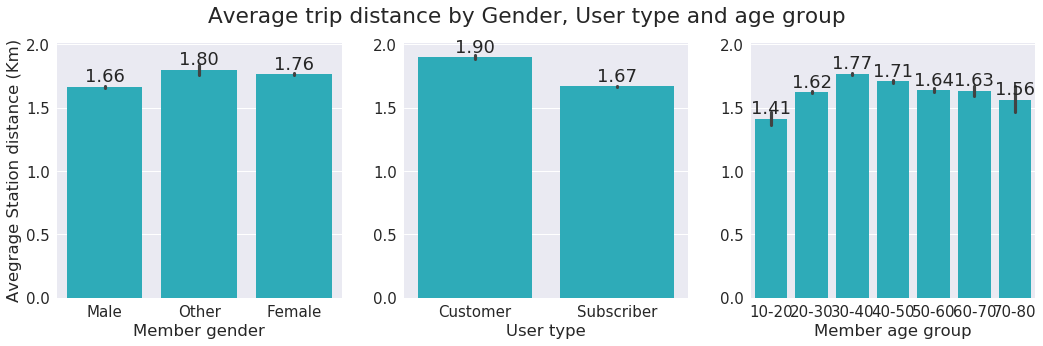

In [7]:

# Resetting the age group back to ordinal categorical data

bins= [10,20,30,40,50,60,70,80]
labels = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80']
df_copy['member_age_group'] = pd.cut(df_copy['member_age'], bins=bins, labels=labels, right=False)

# new data set excluding distance outlier
df_copy_normal_dist = df_copy[df_copy.station_distance_km < 60]

# Plotting
sns.set(font_scale=1.5)
g = sns.PairGrid(df_copy_normal_dist, y_vars="station_distance_km",
                 x_vars=["member_gender", "user_type", "member_age_group"],
                 size=5)

g.map(sns.barplot, color=base_colour);
g.fig.suptitle('Average trip distance by Gender, User type and age group')
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Avegrage Station distance (Km)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type')
g.axes[0,2].xaxis.set_label_text('Member age group')

# For annotations
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Average time, in hours, trips by Users by demographics.
> The Gender "Other" significantly spend more time on the road compared to Males and Females. Customers stay longer with the bikes, because on average they spend more time on trips han Subscribers. Across age groups, the average time spent on trips is roughly the same; 0.19 - 0.23 hours.

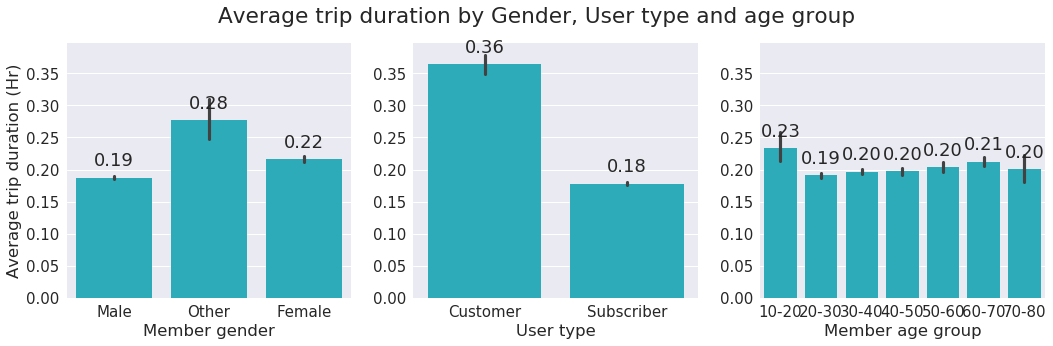

In [8]:
# Plotting bar charts that displays the average trip distance by Gender, User type and Age group
g = sns.PairGrid(df_copy, y_vars="duration_hour",
                 x_vars=["member_gender", "user_type", "member_age_group"],
                 size=5)
g.map(sns.barplot, color=base_colour)
g.fig.suptitle('Average trip duration by Gender, User type and age group')
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Average trip duration (Hr)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type')
g.axes[0,2].xaxis.set_label_text('Member age group')

# For annotations
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 17), textcoords = 'offset points')

## What are the most used docking stations?
Majority of the most used docking staions are around Market Sreet. 

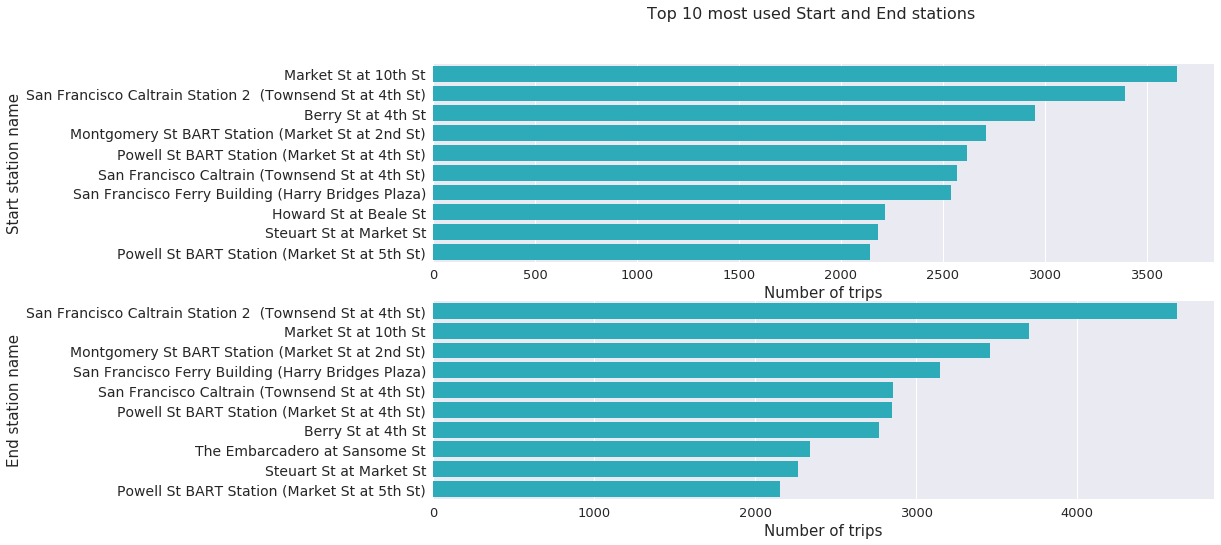

In [9]:

# Filtering top 10 used stations for start and end trips
top_start_vc = df_copy.start_station_name.value_counts().head(10)
end_start_vc = df_copy.end_station_name.value_counts().head(10)

# Creating a  dataframe of most used stations
top_start = df_copy[df_copy['start_station_name'].isin(top_start_vc.index)]
top_end = df_copy[df_copy['end_station_name'].isin(end_start_vc.index)]

# Creating bar charts to display the stations are used most
plt.figure(figsize=(14,8))
plt.suptitle('Top 10 most used Start and End stations', fontsize=16 );

# For the top plot
plt.subplot(2,1,1)
sns.countplot(data=top_start, y='start_station_name', color=base_colour, order= top_start_vc.index);
plt.ylabel('Start station name', fontsize=15)
plt.xlabel('Number of trips', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)

# For the buttom plot
plt.subplot(2,1,2)
sns.countplot(data=top_end, y='end_station_name', color=base_colour, order= end_start_vc.index);
plt.ylabel('End station name', fontsize=15)
plt.xlabel('Number of trips', fontsize=15);
plt.yticks(fontsize=14)
plt.xticks(fontsize=13);

In [13]:
!jupyter nbconvert TRIP_FEATURE_ANALYSIS.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook TRIP_FEATURE_ANALYSIS.ipynb to slides
[NbConvertApp] Writing 757304 bytes to TRIP_FEATURE_ANALYSIS.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/TRIP_FEATURE_ANALYSIS.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-brow